---
# 1. 필요 라이브러리 설치 및 불러오기
---

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)


'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

- Mecab 설치

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip install JPype1
pip install konlpy

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 252 kB in 2s (127 kB/s)
Reading package lis

In [3]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [4]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /tmp/mecab-python-0.996
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp37-cp37m-linux_x86_64.whl size=141797 sha256=f4486b818184e9dffcf78c2fb2699b7d41420ebd12cb558837d91db426ba1139
  Stored in directory: /root/.cache/pip/wheels/40/7b/9f/2922869bef86c3354ae7034f7a3647c573ee1997c2dad0290a
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
      Successfully uninstalled mecab-python-0.996-ko-0.9.2
    Running setup.py install for mecab-python: started
    Running setup.py install for mecab-python: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


- 코랩 한글 설정

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 66 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontcon

In [6]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [7]:
import pandas as pd 
import tensorflow as tf
import re
from tqdm import tqdm
import random
import matplotlib.ticker as ticker
import seaborn as sns
import os

---
# 2. 데이터 가져오기
---

In [8]:
# path_to_zip = tf.keras.utils.get_file(
#     'train.zip',
#     origin='https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz',
#     extract=True)

# path_to_file_ko = os.path.dirname(path_to_zip)+"/korean-english-park.train.ko"
# path_to_file_en = os.path.dirname(path_to_zip)+"/korean-english-park.train.en"

In [9]:
# with open(path_to_file_ko, "r") as f:
#     raw_ko = f.read().splitlines()

# print("Data Size:", len(raw_ko))
# print("Example:")

# for sen in raw_ko[0:100][::20]: print(">>", sen)

In [10]:
# with open(path_to_file_en, "r") as f:
#     raw_en = f.read().splitlines()

# print("Data Size:", len(raw_en))
# print("Example:")

# for sen in raw_en[0:100][::20]: print(">>", sen)

In [11]:
# raw = zip(raw_ko, raw_en)
# raw

In [12]:
# set_raw = set(raw)

In [13]:
# cleaned_corpus_ko, cleaned_corpus_en = zip(*set_raw)

In [177]:
with open("/content/drive/MyDrive/aiffel/Going_Deeper/GD8/data/korean-english-park.train.ko","r") as f:
    train_ko = f.read().splitlines()

with open("/content/drive/MyDrive/aiffel/Going_Deeper/GD8/data/korean-english-park.train.en","r") as f:
    train_en = f.read().splitlines()    

train = pd.DataFrame(zip(train_ko, train_en), columns = ['ko','en'])
train

,ko,en
0,"개인용 컴퓨터 사용의 상당 부분은 ""이것보다 뛰어날 수 있느냐?""","Much of personal computing is about ""can you t..."
1,모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하...,so a mention a few weeks ago about a rechargea...
2,그러나 이것은 또한 책상도 필요로 하지 않는다.,"Like all optical mice, But it also doesn't nee..."
3,"79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분...",uses gyroscopic sensors to control the cursor ...
4,정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔...,Intelligence officials have revealed a spate o...
...,...,...
94118,“우리는 3월 8일 김승연 회장과 그의 아들이 보복폭행에 가담한 혐의를 찾기 위해 ...,””We are hoping to seize material evidence to ...
94119,월요일 술집 종업원 6명은 김회장과 아들에게 폭행을 당했음을 진술했다고 경찰은 말했다.,"” On Monday, police secured statements from si..."
94120,그러나 불충분한 증거 확보로 수사에 어려움이 있다.,But the lack of material evidence is making it...
94121,김회장과 그의 아들은 보복폭행 혐의를 강력히 부인하고 있다.,Kim and his son both deny the allegations.


In [178]:
with open("/content/drive/MyDrive/aiffel/Going_Deeper/GD8/data/korean-english-park.test.ko","r") as f:
    test_ko = f.read().splitlines()

with open("/content/drive/MyDrive/aiffel/Going_Deeper/GD8/data/korean-english-park.test.en","r") as f:
    test_en = f.read().splitlines()    

test = pd.DataFrame(zip(test_ko, test_en), columns = ['ko','en'])
test

,ko,en
0,토론에 참여한 사람들은 법 집행과 국가 안전보장에 대한 우려를 표명해야 할 필요성을...,Those involved in the discussions do take seri...
1,"또한 새로운 기술 개발이 어떤 해결책을 제공해 주는데 도움이 될 것이고, 동시 에 ...",There is also some hope that new technology de...
2,그래서 클리퍼 칩에 대한 개인적인 해결책은 서서히 자취를 감출 것입니다. 그러나 이...,So the individual solution of the clipper chip...
3,이탈리아의 천문학자들이 멀리에 있는 별들의 궤도를 도는 행성의 대기에서 생명체의 필...,"Italian astronomers have found signs of water,..."
4,"물이 있다는 것이 다른 행성에 생명체들이 가득하다는 것을 의미하지는 않지만, 이번 ...",Having water does not mean other planets will ...
...,...,...
1995,코리아 헤럴드는 이번 관련법 개정으로 해외 부동산을 취득하고자 하는 개인에 대한 규...,The Korea Herald reports part of these changes...
1996,또한 투자 펀드를 통해 해외 부동산에 투자하고자 하는 사람들에게도 유리해지도록 법 ...,Other legal changes will help those aiming to ...
1997,"반 외교부장관, 최근 핵 문제 관련 북한 태도에 경고",Foreign minister Ban warned North Korea for it...
1998,"일본, 통근 열차 탈선 사고로 최소 69명 사망",Japan's derailed commuter train accident has k...


---
# 3. 데이터 정제하기
---

---
### 3-1 중복 제거
----

- 전체 개수

In [179]:
len(train)

94123

- 중복 개수

In [180]:
train[train.duplicated()]

,ko,en
7789,이들 의원 중 1명은 빌 클린턴 전 대통령이 지난 몇 주간 부인 힐러리에게 오바마의...,"One of the lawmakers said Clinton's husband, f..."
9925,*판매 제품,The goods
10070,* 알아두면 좋은 것:,Good to know:
10074,* 알아두면 좋은 것:,Good to know:
10079,* 알아두면 좋은 것:,Good to know:
...,...,...
93792,"힐러리 클린턴, 북한 방문할까",Would Hillary Clinton visit North Korea?
93793,"이라크 새 의회, 첫 개정",Iraq’s new assembly is going to hold its first...
93933,"노 대통령 검찰, 민주적 통제 받아야 2005.12",Roh says prosecutors need civilian control.
94002,"카우치 멤버, 사전 모의 시인 2005.09",Members of The Couch planned it before the show.


- 중복 제거

In [181]:
train.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)
train.shape

(78968, 2)

- 테스트 값 중복 제거

In [182]:
test.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)
test.shape

(1996, 2)

---
### 3-2 데이터 전처리
---

- Mecab에 영어 문장 토큰화를 테스트

In [183]:
print(mecab.morphs('Roh says prosecutors need civilian control.'))

['Roh', 'says', 'prosecutors', 'need', 'civilian', 'control', '.']


테스트한 결과 공백을 기준으로 나누는 것을 확인할 수 있다.

In [184]:
def preprocess_sentence(sentence, s_token=False, e_token=False):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!가-힣ㄱ-ㅎㅏ-ㅣ]+", " ", sentence)
    sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    return sentence

In [185]:
# def preprocess_sentence(sentence, s_token=False, e_token=False):
#     sentence = sentence.lower().strip()

#     sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
#     sentence = re.sub(r'[" "]+', " ", sentence)
#     sentence = re.sub(r"[^0-9a-zA-Z가-힣ㄱ-ㅎㅏ-ㅣ?.!,]+", " ", sentence)

#     sentence = sentence.strip()

#     if s_token:
#         sentence = '<start> ' + sentence

#     if e_token:
#         sentence += ' <end>'
    
#     return sentence

- train 문장의 최대 길이 확인

In [186]:
import numpy as np 

total_data_text = list(train['ko'])
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

문장길이 평균 :  63.927476952689695
문장길이 최대 :  377
문장길이 표준편차 :  27.626950153629995


- 40을 기준으로 할 경우 전체 문장의 약 0.19% 밖에 포함이 안된다.

In [187]:
# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = 40
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(round(np.sum(num_tokens < max_tokens) / len(num_tokens),5)))

전체 문장의 0.18984%가 maxlen 설정값 이내에 포함됩니다. 


In [188]:
# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = 50
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(round(np.sum(num_tokens < max_tokens) / len(num_tokens),5)))

전체 문장의 0.3186%가 maxlen 설정값 이내에 포함됩니다. 


- 전처리

In [189]:
train['ko'] = train['ko'].apply(lambda x: preprocess_sentence(x))
train['en'] = train['en'].apply(lambda x: preprocess_sentence(x, s_token=True, e_token=True))

- 테스트 동일하게 처리

In [190]:
total_data_text = list(test['ko'])
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = 50
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  66.97094188376754
문장길이 최대 :  219
문장길이 표준편차 :  27.959015906421676
전체 문장의 0.28256513026052105%가 maxlen 설정값 이내에 포함됩니다. 


In [191]:
test['ko'] = test['ko'].apply(lambda x: preprocess_sentence(x))
test['en'] = test['en'].apply(lambda x: preprocess_sentence(x, s_token=True, e_token=True))

---
### 3-3 짧은 문장 제거
---

- 한글 기준 5보다 작은 수는 의미 없는 단어들이 많으니 해당 값 제거

In [192]:
small_len_list = []
for i in range(len(train)):
  if len(train['ko'][i]) < 5:
    small_len_list.append(i)

In [193]:
small_len_list

[27,
 30,
 282,
 1456,
 2226,
 3003,
 3100,
 3104,
 3172,
 3288,
 3289,
 3291,
 3295,
 3329,
 3366,
 3374,
 3486,
 3557,
 4609,
 4758,
 4812,
 4833,
 5034,
 5065,
 5218,
 5220,
 5278,
 5346,
 5375,
 5494,
 5495,
 5514,
 5596,
 5742,
 5778,
 5782,
 5791,
 5800,
 6262,
 6267,
 6271,
 6274,
 8292,
 8293,
 8387,
 8392,
 8932,
 8938,
 8942,
 9911,
 10064,
 10072,
 10128,
 10170,
 10174,
 10180,
 10482,
 10487,
 10497,
 11717,
 11842,
 12649,
 12661,
 12860,
 12868,
 13326,
 13335,
 15245,
 18955,
 21041,
 22486,
 22492,
 22495,
 26656,
 26663,
 26931,
 26937,
 26946,
 29814,
 29826,
 29830,
 32748,
 33234,
 33432,
 33656,
 34403,
 41012,
 47352,
 49455,
 49971,
 50088,
 50110,
 50183,
 50217,
 50256,
 50276,
 50465,
 50490,
 51306,
 51764,
 52434,
 52943,
 52960,
 53331,
 53333,
 53383,
 53503,
 54644,
 55060,
 55357,
 55400,
 55542,
 55612,
 55640,
 55721,
 55723,
 56115,
 56678,
 57152,
 57161,
 57384,
 58631,
 59916,
 61279,
 61534,
 63035,
 63138,
 63240,
 63577,
 63759,
 64114,
 64611,

- 짧은 문장 처리 전 길이

In [195]:
train.shape

(78968, 2)

In [196]:
train = train.drop(index = small_len_list, axis = 0)
train.reset_index(drop = True, inplace = True)
train.shape

(78799, 2)

- 테스트 동일하게 처리

In [197]:
small_len_list_test = []
for i in range(len(test)):
  if len(test['ko'][i]) < 5:
    small_len_list_test.append(i)

- 짧은 문장 처리 전 길이

In [198]:
test.shape

(1996, 2)

In [199]:
test = test.drop(index = small_len_list_test, axis = 0)
test.reset_index(drop = True, inplace = True)
test.shape

(1988, 2)

- 한글 기준 문장 길이 50 이하만 사용

In [200]:
enc_corpus = []
dec_corpus = []

for i in range(len(train)):
  if len(train['ko'][i]) <= 40 :
    enc_corpus.append(train['ko'][i])
    dec_corpus.append(train['en'][i])

In [201]:
print("Korea:", enc_corpus[100])
print("English:", dec_corpus[100])

Korea: 내 남은 인생을 어설픈 알라스카인으로 살아가고 싶지 않았습니다 .
English: <start> i didn t want to go around the rest of my life being a half baked alaskan . <end>


In [202]:
enc_corpus_test = []
dec_corpus_test = []

for i in range(len(test)):
   if len(test['ko'][i]) <= 40 :
    enc_corpus_test.append(test['ko'][i])
    dec_corpus_test.append(test['en'][i])

print("Korea:", enc_corpus_test[100])
print("English:", dec_corpus_test[100])

Korea: 제네바 조약 상 적십자 표장의 불법 사용은 금지 사항이다 .
English: <start> wrongly using the red cross logo is prohibited by the geneva conventions . <end>


In [203]:
print(len(enc_corpus))
print(len(dec_corpus))
print(len(enc_corpus_test))
print(len(dec_corpus_test))

16345
16345
347
347


In [204]:
# enc_corpus = []
# dec_corpus = []

# for ko, en in zip(cleaned_corpus_ko, cleaned_corpus_en):
#     temp_ko = preprocess_sentence(ko)
#     temp_en = preprocess_sentence(en, s_token=True, e_token=True)

#     if len(temp_ko) <= 40:
#         enc_corpus.append(temp_ko)
#         dec_corpus.append(temp_en)
    
# print('korean data size:', len(enc_corpus))
# print('english data size:', len(dec_corpus))
# print("Korean:", enc_corpus[0])   
# print("English:", dec_corpus[0])  

---
### 3-4 토큰화
---

In [209]:
from konlpy.tag import Mecab

vocab_size = 30000

def tokenize(corpus, kor=False, eng=False):
    if kor:
        mecab = Mecab()
        morph = [" ".join(mecab.morphs(sen)) for sen in corpus]
        tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',
                                                         num_words=vocab_size)
        tokenizer.fit_on_texts(morph)

        tensor = tokenizer.texts_to_sequences(morph)
        tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

        
    if eng:
        tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',
                                                         num_words=vocab_size)
        tokenizer.fit_on_texts(corpus)

        tensor = tokenizer.texts_to_sequences(corpus)
        tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [206]:
# vocab_size = 30000

# def tokenize(corpus, eng = False, kor = False):
#     if kor :

#       morph = [" ".join(mecab.morphs(sen)) for sen in corpus]
#       tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',
#                                                           num_words=vocab_size)
#       tokenizer.fit_on_texts(morph)

#       tensor = tokenizer.texts_to_sequences(morph)

#       tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

#     if eng:

#       tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',
#                                                         num_words=vocab_size)
#       tokenizer.fit_on_texts(corpus)

#       tensor = tokenizer.texts_to_sequences(corpus)
#       tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

#     return tensor, tokenizer

In [210]:
enc_tensor, enc_tokenizer = tokenize(enc_corpus, kor = True )
dec_tensor, dec_tokenizer = tokenize(dec_corpus, eng = True)

In [211]:
print("Korea Vocab Size:", len(enc_tokenizer.index_word))
print("English Vocab Size:", len(dec_tokenizer.index_word))

Korea Vocab Size: 17584
English Vocab Size: 16941


- 테스트 동일하게 처리

In [212]:
enc_tensor_test, enc_tokenizer_test = tokenize(enc_corpus_test, kor = True)
dec_tensor_test, dec_tokenizer_test = tokenize(dec_corpus_test, eng = True)

- tokenizer 사이즈 확인

In [213]:
print("Korea_test Vocab Size:", len(enc_tokenizer_test.index_word))
print("English_test Vocab Size:", len(dec_tokenizer_test.index_word))

Korea_test Vocab Size: 1643
English_test Vocab Size: 1818


---
# 4. 모델 설계하기
---

In [214]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

In [215]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()

        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units,
                                       return_sequences=True)

    def call(self, x):
        out = self.embedding(x)
        out = self.gru(out)

        return out

In [216]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units,
                                       return_sequences=True,
                                       return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)
             #  Fully Connected Layer
        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)

        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)
        
        out, h_dec = self.gru(out)
        out = tf.reshape(out, (-1, out.shape[2]))
        out = self.fc(out)

        return out, h_dec, attn

In [217]:
# 코드를 실행하세요.

BATCH_SIZE     = 64
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

units         = 1024
embedding_dim = 512

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

# sample input
sequence_len = 40

sample_enc = tf.random.uniform((BATCH_SIZE, sequence_len))
sample_output = encoder(sample_enc)

print ('Encoder Output:', sample_output.shape)

sample_state = tf.random.uniform((BATCH_SIZE, units))

sample_logits, h_dec, attn = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                     sample_state, sample_output)

print ('Decoder Output:', sample_logits.shape)
print ('Decoder Hidden State:', h_dec.shape)
print ('Attention:', attn.shape)

Encoder Output: (64, 40, 1024)
Decoder Output: (64, 16942)
Decoder Hidden State: (64, 1024)
Attention: (64, 40, 1)


---
# 5. 훈련하기
---

---
### 5-1. Optimizer & Loss
---

In [218]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)

---
### 5-2 train_step 구현하기
---

In [219]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)
        h_dec = enc_out[:, -1]
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss

---
### 5-3 eval_step
---

In [220]:
# Define eval_step

@tf.function
def eval_step(src, tgt, encoder, decoder, dec_tok):
    bsz = src.shape[0]
    loss = 0

    enc_out = encoder(src)

    h_dec = enc_out[:, -1]
    
    dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

    for t in range(1, tgt.shape[1]):
        pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

        loss += loss_function(tgt[:, t], pred)
        dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))
    
    return batch_loss


---
# 6. 훈련하기
---

In [227]:
from tqdm import tqdm    # tqdm
import random

EPOCHS = 10
train_loss = []

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_tensor.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)    # tqdm

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_tensor[idx:idx+BATCH_SIZE],
                                dec_tensor[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))    # tqdm
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))    # tqdm
        train_loss.append((total_loss.numpy() / (batch + 1)))

Epoch 10: 100%|██████████| 256/256 [01:50<00:00,  2.31it/s, Loss 0.4204]


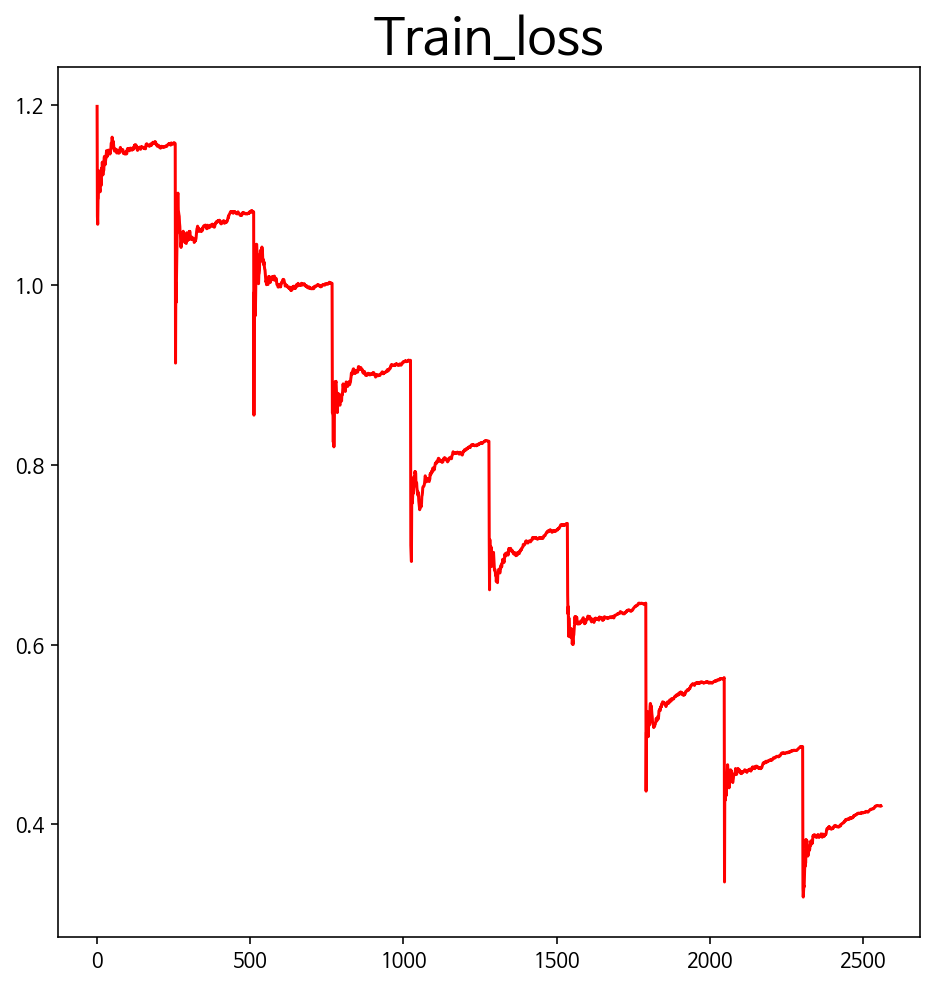

In [228]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.title('Train_loss',fontsize = 25)
plt.plot(train_loss, color = 'r')

# plt.subplot(1,2,2)
# plt.title('Test_loss', fontsize = 25)
# plt.plot(test_losses)

In [229]:
def evaluate(sentence, encoder, detcoder):
    attention = np.zeros((dec_tensor.shape[-1], enc_tensor.shape[-1]))
    
    sentence = preprocess_sentence(sentence)
    # sentence = mecab.morphs(sentence)
    inputs = enc_tokenizer.texts_to_sequences([sentence])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=enc_tensor.shape[-1],
                                                           padding='post')

    result = ''

    enc_out = encoder(inputs)

    dec_hidden = enc_out[:, -1]
    dec_input = tf.expand_dims([dec_tokenizer.word_index['<start>']], 0)

    for t in range(dec_tensor.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += dec_tokenizer.index_word[predicted_id] + ' '

        if dec_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention

# Attention Map
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    temp_result = re.sub(r'<end>'," ", result)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(temp_result))
    
    attention = attention[:len(result.split()), :len(sentence.split())]
    plot_attention(attention, sentence.split(), result.split(' '))

In [230]:
import warnings
warnings.filterwarnings('ignore')

In [231]:
test_word = ['오바마는 대통령이다.',
             '시민들은 도시 속에 산다.',
             '커피는 필요 없다.',
             '일곱 명의 사망자가 발생했다.',]

Input: 오바마는 대통령이다 .
Predicted translation: . lend a combination of albatross in tsa doesn t recognize gender bias   


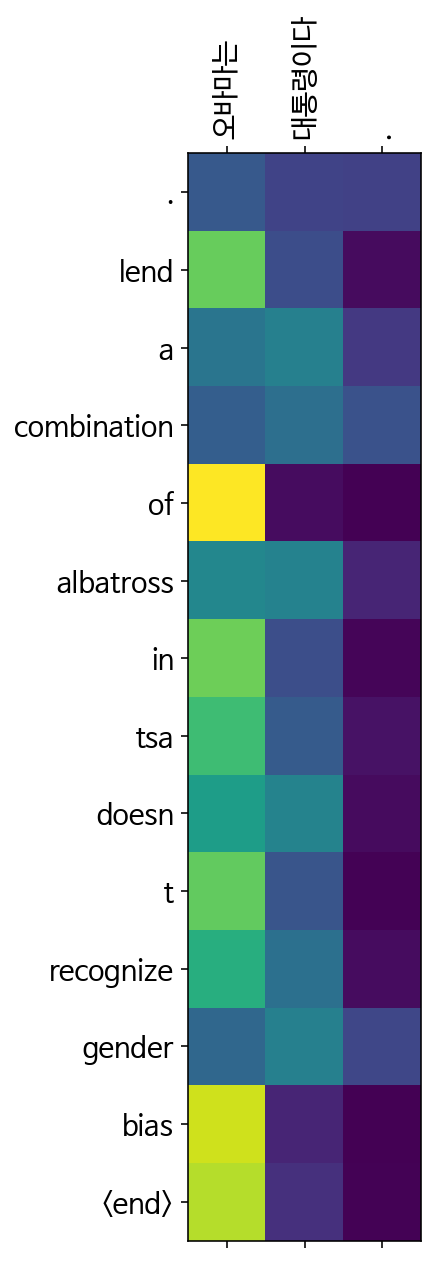

Input: 시민들은 도시 속에 산다 .
Predicted translation: it s important to the kitchen too long .   


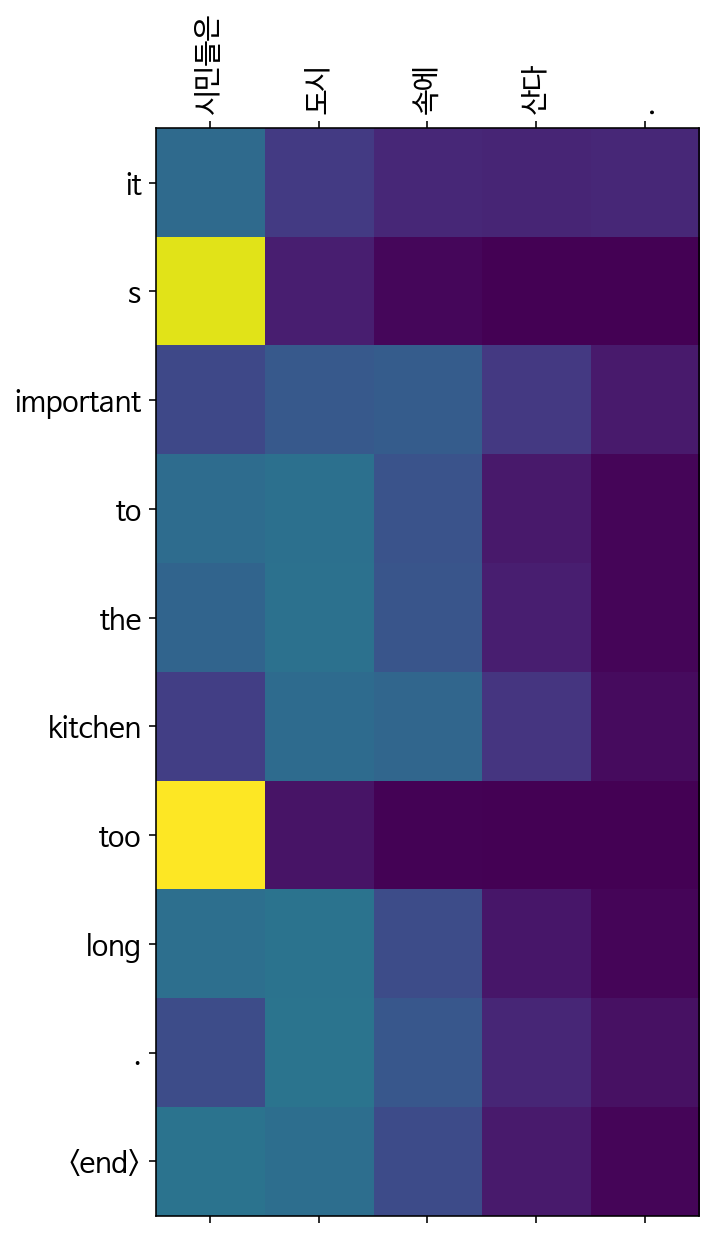

Input: 커피는 필요 없다 .
Predicted translation: that s not even keep her to recharge your daily muscles are nutritious .   


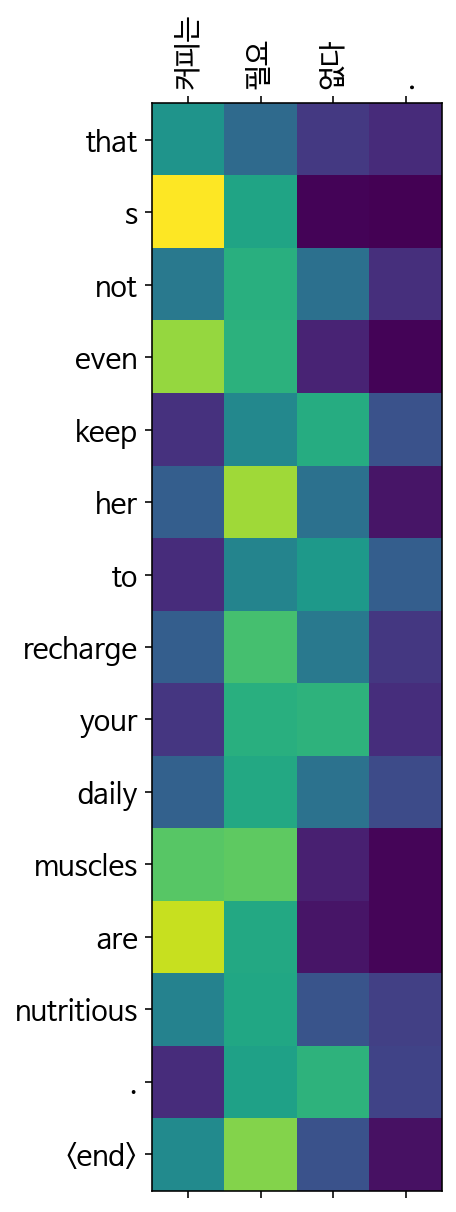

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the hotel were also barred from the city of the past were damaged and were married in the city of the past were damaged and were married in the city of the past were damaged and were married in the city of the past were damaged and were married in the city of the past were damaged and were married in the city of the 


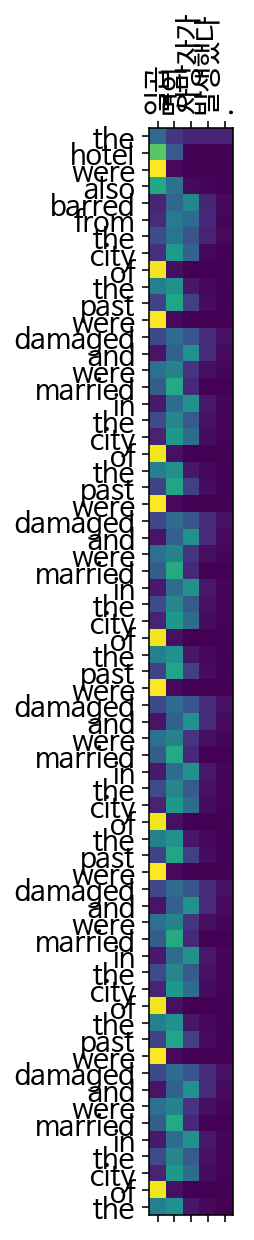

In [232]:
for i in test_word:
  translate(i, encoder, decoder)  

----
# 7. 오류
---

여러 시도들 중 번역된 문장을 생성하는 것에 주요한 요인에는 batch_size / units / embedding_dim의 값이라는 것을 알게 되었다.

해당 값을 변경하면서 겪은 오류들을 기술해 보려 한다.

---
###7-1 오류 1번
----

- 문장을 len < 40을 기준으로 자르지 않고 모두 사용하였을 때, 나온 오류이다

In [ ]:
# 코드를 실행하세요.

BATCH_SIZE     = 64
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

units         = 256
embedding_dim = 256

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

In [ ]:
from tqdm import tqdm    # tqdm
import random

EPOCHS = 15
train_loss = []

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_tensor.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)    # tqdm

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_tensor[idx:idx+BATCH_SIZE],
                                dec_tensor[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))    # tqdm
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))    # tqdm
        train_loss.append((total_loss.numpy() / (batch + 1)))

Epoch 15: 100%|██████████| 1234/1234 [10:28<00:00,  1.96it/s, Loss nan]


터진 이유를 고민해 보자면 많은 단어들이 존재하는데 batch_size가 작아서 과부하가 일어난 것 같다.

---
### 7-2 오류 2번
---

In [ ]:
BATCH_SIZE     = 256
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

units         = 1025
embedding_dim = 256 

In [ ]:
from tqdm import tqdm  # tqdm
import random

EPOCHS = 20

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)  # tqdm

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_train[idx:idx+BATCH_SIZE],
                                dec_train[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))  # tqdm
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))  # tqdm

  0%|          | 0/161 [01:51<?, ?it/s]


ResourceExhaustedError: ignored

batch_size를 128, 256으로 설정하고 units을 1024로 설정했을 떄, 위와 같은 오류가 나왔다.  
6번(units = 1024)을 훈련 했을 때 batch_size가 64일 경우에도 잘 돌아 갔던 걸로 보아   
units과 embedding 차원이 어떠한 관계가 있는 것이라 판단 하였지만,  
embedding 값을 늘리거나 줄여도 동일한 오류가 발생 하였다.  
  
해당 과정에서는 전에 len < 70으로 수정하여 단어장의 크기를 증가시켰다.   
units의 수를 512로 줄였을 때, 정상적으로 돌아갔다.  
전체 문장 및 단어장의 크기가 영향을 미친 것 같다.  

---
# 8. 회고
---

In [234]:
print(mecab.morphs('Roh says prosecutors need civilian control. <start>'))

['Roh', 'says', 'prosecutors', 'need', 'civilian', 'control', '.', '<', 'start', '>']


- 번역은 엉뚱한 것을 하기는 하지만 영어 문장은 말이 되는 문장들이 나오는 것을 볼 수 있다. 
- 한글과 영어를 토큰화하는 과정에서 Mecab을 사용해서 같이 토큰화를 진행하려 했다. 
- 하지만 위와 같이 \<start>토큰을 넣어주는 과정에서 해당 토큰의 <,>를 모두 나누는 일이 발생해 if문을 사용해 영어일때와 한국어 일때를 나눠서 토큰화를 진행하였다. 
- 다른 방식으로는 토큰화를 먼저 진행하고 start,end 토큰을 넣어주는 방식도 있을 것이다. 

- 해당 번역기를 생성해내는 과정에서 많은 오류들을 거쳤다. 
- 지금의 최종 결과물을 도출해내기 이전에 번역되는 문장들은 (the the the the ...)를 반복하거나 (\<start>)를 반복하거나 (\<end>) 토큰만 나오는 문제들이 있었다.
- 처음엔 토큰화하는 과정에서 나타난 문제라고 생각을 기반으로, 한글의 문장 길이와 영문의 문장 길이의 차이로 인해 의미 없는 0이라는 값을 오해하는 과정이 있을 수 있다고 판단하여, 한글과 영어의 maxlen을 맞춰 주었다.
- 결론 적으로는 문제를 해결하지 못 하였고 문장 길이의 차이가 영향이 없었으나, 새로운 고민을 해보며 이해를 증진 시키는 것에 있어 도움이 되었다고 생각한다.
- 또한 토큰화 과정에서 한글은 형태소로, 영어는 공백 기반으로 나누었다. 해당 과정이 한영 번역에 어떤 미칠지 궁금해 두 언어 모두 공백 기반으로 나눠 테스트를 해보았으나, 결론적으로 긍정적인 영향을 미치지 못 하였다. 
